In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import time 
from tensorflow.keras.models import Sequential, load_model
from keras.layers import SimpleRNN, Dense
from keras.layers import LSTM, Dense, SimpleRNN
import tensorflow as tf
import statistics
import keras
from keras.layers import Dense,Dropout,Conv3D,Conv1D,Conv2D,Flatten,MaxPool2D
%load_ext tensorboard

In [2]:
data_path_and_labels = pd.read_csv("../mapped_data/camel-1.2.csv")
data_path_and_labels['data_path'][0]

'dataset/promise/defect data/camel-1.2/src/components/camel-irc/src/main/java/org/apache/camel/component/irc/IrcExchange.java.restrictedcontent.embed'

In [3]:
data_path_and_labels['data_path'] = '../' + data_path_and_labels['data_path']
data_path_and_labels['data_path'][0]

'../dataset/promise/defect data/camel-1.2/src/components/camel-irc/src/main/java/org/apache/camel/component/irc/IrcExchange.java.restrictedcontent.embed'

In [4]:
data_path_and_labels['data_path'] = data_path_and_labels['data_path'].str.replace('.embed','')
data_path_and_labels['data_path'][0]

'../dataset/promise/defect data/camel-1.2/src/components/camel-irc/src/main/java/org/apache/camel/component/irc/IrcExchange.java.restrictedcontent'

In [5]:
words = []
for index, row in data_path_and_labels.iterrows():
    with open(row['data_path']) as f:
        lines = f.read().splitlines()
    words.append(lines)

In [6]:
d = pd.read_csv("../mapped_data/camel-1.2.csv")
d['data_path'][0]

'dataset/promise/defect data/camel-1.2/src/components/camel-irc/src/main/java/org/apache/camel/component/irc/IrcExchange.java.restrictedcontent.embed'

In [7]:
d['data_path'] = '../' + d['data_path']
d['data_path'][0]

'../dataset/promise/defect data/camel-1.2/src/components/camel-irc/src/main/java/org/apache/camel/component/irc/IrcExchange.java.restrictedcontent.embed'

In [8]:
d

data_path   bugs
0    ../dataset/promise/defect data/camel-1.2/src/c...      0
1    ../dataset/promise/defect data/camel-1.2/src/c...      0
2    ../dataset/promise/defect data/camel-1.2/src/c...      0
3    ../dataset/promise/defect data/camel-1.2/src/c...      0
4    ../dataset/promise/defect data/camel-1.2/src/c...      0
..                                                 ...    ...
590  ../dataset/promise/defect data/camel-1.2/src/c...      1
591  ../dataset/promise/defect data/camel-1.2/src/c...      0
592  ../dataset/promise/defect data/camel-1.2/src/c...      1
593  ../dataset/promise/defect data/camel-1.2/src/c...      0
594  ../dataset/promise/defect data/camel-1.2/src/c...      2

[595 rows x 2 columns]

In [9]:
train, test = train_test_split(d, test_size=0.2)

In [10]:
test_x = []
for index, row in test.iterrows():
    with open(row['data_path']) as f:
        lines = list(map(float, f.read().splitlines())) 
    test_x.append(lines)

In [11]:
train_x = []
for index, row in train.iterrows():
    with open(row['data_path']) as f:
        lines = list(map(float, f.read().splitlines())) 
    train_x.append(lines)

In [12]:
train_x[0]

[223.0,
 3007.0,
 2414.0,
 880.0,
 1262.0,
 2319.0,
 1262.0,
 3535.0,
 3534.0,
 3209.0,
 504.0,
 3993.0,
 2319.0,
 2108.0,
 6036.0,
 881.0,
 504.0,
 4691.0,
 2414.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [13]:
vocab = float(max(np.max(train_x), np.max(test_x)))
vocab

6319.0

In [14]:
train_y = train[' bugs'].to_numpy()
test_y = test[' bugs'].to_numpy()

In [15]:
train_y

array([ 0,  0,  0,  0,  1,  2,  3,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  2,  0,  2,  1,  1,  2,  1,  1,  0,  0,  0,  0,  0,  6,  1,
        4,  0,  0,  0,  0,  0,  9,  0,  0,  2,  0,  1,  0,  2,  1,  0,  1,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  2,  0,  4,  3,  2,  6,  0,  3,
        0,  7,  2,  0,  0,  4,  0,  2,  0,  0,  4,  3,  3,  2,  0,  2,  3,
        1,  1,  0,  8,  0,  0,  0,  0,  3,  1,  5,  9,  0,  0,  0,  3,  0,
        0,  0,  0,  4,  0,  1,  9,  0,  0,  0,  0,  1,  0,  1,  2,  0,  0,
        0,  0,  0,  1,  0,  9,  0,  1,  0,  1,  0,  3,  0,  0,  0,  0,  4,
        1,  0,  0,  2,  0,  1,  0,  1,  0,  7,  0,  3,  0,  3,  0,  0,  0,
        2,  5,  0,  2,  0,  0,  1,  3,  1,  0,  0,  1,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  1,  0,  4,
        0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  2,  0,  0,  0,  4,
        0,  0,  0,  1,  3,  0,  0,  0,  5,  0,  2,  0,  0,  0,  0,  0,  0,
        0,  0,  3,  0,  2

In [16]:
train_x = np.array(train_x)
test_x = np.array(test_x)

In [17]:
train_x.shape

(476, 1765)

In [2]:
def define_model():
    # define the model
    model = Sequential()
    model.add(tf.keras.layers.Embedding(10671, 6, input_length=1765))
    model.add(Conv1D(2, kernel_size=2, activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(Dense(1, activation='relu'))
    # compile the model
    model.compile(loss = 'mse' , optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) , metrics = ['mse', 'mae', tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanSquaredLogarithmicError()] )  
    return model

In [3]:
model = define_model()

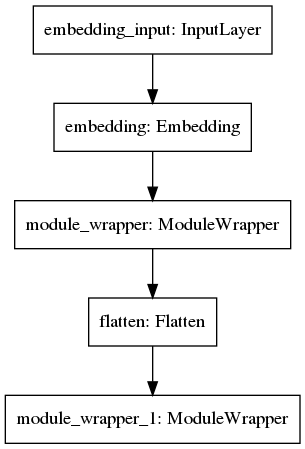

In [7]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    dpi=96,
)

In [19]:
y = list(test_y)
y

[1,
 0,
 1,
 0,
 0,
 5,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 3,
 0,
 0,
 1,
 0,
 2,
 8,
 2,
 4,
 0,
 1,
 1,
 1,
 1,
 0,
 3,
 0,
 0,
 1,
 0,
 0,
 3,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 4,
 3,
 1,
 0,
 0,
 0,
 1]

In [20]:
total_training_time = []
total_scores = []
total_training_loss_history = []
test_ARE = []
total_predictions = []
for i in range(30):
    print("Run no: " + str(i))
    model = define_model()
    log_dir = '/home/bavanya/Documents/AST_Training_curves/5dim_camel1.2/' + 'run' + str(i)
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    start = time.time()
    history = model.fit(train_x, train_y, epochs = 100, batch_size = 100, callbacks=[tensorboard_callback])
    stop = time.time()
    total_training_time.append(stop - start) 
    total_training_loss_history.append(history.history)
    score = model.evaluate(test_x, test_y)
    total_scores.append(score) 
    predictions = model.predict(test_x)
    x = predictions.tolist()
    x = list(np.concatenate(x))
    x = [round(i) for i in x]
    total_predictions.append(x)
    ARE_test = tf.keras.metrics.MeanRelativeError(normalizer=y)
    ARE_test.update_state(y, x)
    test_ARE.append(ARE_test.result().numpy())
    print("score of " + str(i) + "th run is: " + ', '.join(map(str,score)))

Run no: 0
Epoch 1/100
5/5 [==============================] - 1s 38ms/step - loss: 4.9830 - mse: 4.9830 - mae: 0.9218 - root_mean_squared_error: 2.2323 - mean_squared_logarithmic_error: 0.5196
Epoch 2/100
5/5 [==============================] - 0s 28ms/step - loss: 4.9162 - mse: 4.9162 - mae: 0.9321 - root_mean_squared_error: 2.2173 - mean_squared_logarithmic_error: 0.4937
Epoch 3/100
5/5 [==============================] - 0s 31ms/step - loss: 4.8499 - mse: 4.8499 - mae: 0.9439 - root_mean_squared_error: 2.2023 - mean_squared_logarithmic_error: 0.4698
Epoch 4/100
5/5 [==============================] - 0s 32ms/step - loss: 4.7822 - mse: 4.7822 - mae: 0.9556 - root_mean_squared_error: 2.1868 - mean_squared_logarithmic_error: 0.4471
Epoch 5/100
5/5 [==============================] - 0s 30ms/step - loss: 4.7176 - mse: 4.7176 - mae: 0.9708 - root_mean_squared_error: 2.1720 - mean_squared_logarithmic_error: 0.4289
Epoch 6/100
5/5 [==============================] - 0s 27ms/step - loss: 4.6417 -

5/5 [==============================] - 0s 28ms/step - loss: 3.6084 - mse: 3.6084 - mae: 1.1036 - root_mean_squared_error: 1.8996 - mean_squared_logarithmic_error: 0.3697
Epoch 89/100
5/5 [==============================] - 0s 32ms/step - loss: 3.5905 - mse: 3.5905 - mae: 1.1037 - root_mean_squared_error: 1.8949 - mean_squared_logarithmic_error: 0.3699
Epoch 90/100
5/5 [==============================] - 0s 25ms/step - loss: 3.5739 - mse: 3.5739 - mae: 1.1013 - root_mean_squared_error: 1.8905 - mean_squared_logarithmic_error: 0.3682
Epoch 91/100
5/5 [==============================] - 0s 25ms/step - loss: 3.5590 - mse: 3.5590 - mae: 1.0992 - root_mean_squared_error: 1.8865 - mean_squared_logarithmic_error: 0.3665
Epoch 92/100
5/5 [==============================] - 0s 24ms/step - loss: 3.5479 - mse: 3.5479 - mae: 1.0970 - root_mean_squared_error: 1.8836 - mean_squared_logarithmic_error: 0.3650
Epoch 93/100
5/5 [==============================] - 0s 23ms/step - loss: 3.5306 - mse: 3.5306 - ma

5/5 [==============================] - 0s 22ms/step - loss: 5.0210 - mse: 5.0210 - mae: 0.9160 - root_mean_squared_error: 2.2408 - mean_squared_logarithmic_error: 0.5353
Epoch 75/100
5/5 [==============================] - 0s 23ms/step - loss: 5.0210 - mse: 5.0210 - mae: 0.9160 - root_mean_squared_error: 2.2408 - mean_squared_logarithmic_error: 0.5353
Epoch 76/100
5/5 [==============================] - 0s 23ms/step - loss: 5.0210 - mse: 5.0210 - mae: 0.9160 - root_mean_squared_error: 2.2408 - mean_squared_logarithmic_error: 0.5353
Epoch 77/100
5/5 [==============================] - 0s 24ms/step - loss: 5.0210 - mse: 5.0210 - mae: 0.9160 - root_mean_squared_error: 2.2408 - mean_squared_logarithmic_error: 0.5353
Epoch 78/100
5/5 [==============================] - 0s 24ms/step - loss: 5.0210 - mse: 5.0210 - mae: 0.9160 - root_mean_squared_error: 2.2408 - mean_squared_logarithmic_error: 0.5353
Epoch 79/100
5/5 [==============================] - 0s 24ms/step - loss: 5.0210 - mse: 5.0210 - ma

5/5 [==============================] - 0s 22ms/step - loss: 3.6346 - mse: 3.6346 - mae: 1.1047 - root_mean_squared_error: 1.9065 - mean_squared_logarithmic_error: 0.3704
Epoch 61/100
5/5 [==============================] - 0s 36ms/step - loss: 3.6103 - mse: 3.6103 - mae: 1.0990 - root_mean_squared_error: 1.9001 - mean_squared_logarithmic_error: 0.3659
Epoch 62/100
5/5 [==============================] - 0s 33ms/step - loss: 3.5962 - mse: 3.5962 - mae: 1.0954 - root_mean_squared_error: 1.8964 - mean_squared_logarithmic_error: 0.3634
Epoch 63/100
5/5 [==============================] - 0s 29ms/step - loss: 3.5782 - mse: 3.5782 - mae: 1.0927 - root_mean_squared_error: 1.8916 - mean_squared_logarithmic_error: 0.3614
Epoch 64/100
5/5 [==============================] - 0s 28ms/step - loss: 3.5580 - mse: 3.5580 - mae: 1.0909 - root_mean_squared_error: 1.8863 - mean_squared_logarithmic_error: 0.3602
Epoch 65/100
5/5 [==============================] - 0s 33ms/step - loss: 3.5392 - mse: 3.5392 - ma

5/5 [==============================] - 0s 31ms/step - loss: 4.0012 - mse: 4.0012 - mae: 1.1434 - root_mean_squared_error: 2.0003 - mean_squared_logarithmic_error: 0.4033
Epoch 47/100
5/5 [==============================] - 0s 27ms/step - loss: 3.9896 - mse: 3.9896 - mae: 1.1429 - root_mean_squared_error: 1.9974 - mean_squared_logarithmic_error: 0.4026
Epoch 48/100
5/5 [==============================] - 0s 21ms/step - loss: 3.9790 - mse: 3.9790 - mae: 1.1418 - root_mean_squared_error: 1.9947 - mean_squared_logarithmic_error: 0.4015
Epoch 49/100
5/5 [==============================] - 0s 23ms/step - loss: 3.9650 - mse: 3.9650 - mae: 1.1384 - root_mean_squared_error: 1.9912 - mean_squared_logarithmic_error: 0.3984
Epoch 50/100
5/5 [==============================] - 0s 25ms/step - loss: 3.9548 - mse: 3.9548 - mae: 1.1378 - root_mean_squared_error: 1.9887 - mean_squared_logarithmic_error: 0.3978
Epoch 51/100
5/5 [==============================] - 0s 25ms/step - loss: 3.9445 - mse: 3.9445 - ma

5/5 [==============================] - 0s 28ms/step - loss: 4.1462 - mse: 4.1462 - mae: 1.1579 - root_mean_squared_error: 2.0362 - mean_squared_logarithmic_error: 0.4191
Epoch 33/100
5/5 [==============================] - 0s 29ms/step - loss: 4.1410 - mse: 4.1410 - mae: 1.1606 - root_mean_squared_error: 2.0349 - mean_squared_logarithmic_error: 0.4214
Epoch 34/100
5/5 [==============================] - 0s 32ms/step - loss: 4.1339 - mse: 4.1339 - mae: 1.1601 - root_mean_squared_error: 2.0332 - mean_squared_logarithmic_error: 0.4208
Epoch 35/100
5/5 [==============================] - 0s 29ms/step - loss: 4.1289 - mse: 4.1289 - mae: 1.1584 - root_mean_squared_error: 2.0320 - mean_squared_logarithmic_error: 0.4192
Epoch 36/100
5/5 [==============================] - 0s 29ms/step - loss: 4.1242 - mse: 4.1242 - mae: 1.1579 - root_mean_squared_error: 2.0308 - mean_squared_logarithmic_error: 0.4187
Epoch 37/100
5/5 [==============================] - 0s 33ms/step - loss: 4.1177 - mse: 4.1177 - ma

5/5 [==============================] - 0s 24ms/step - loss: 4.1993 - mse: 4.1993 - mae: 1.1251 - root_mean_squared_error: 2.0492 - mean_squared_logarithmic_error: 0.3953
Epoch 19/100
5/5 [==============================] - 0s 24ms/step - loss: 4.1766 - mse: 4.1766 - mae: 1.1366 - root_mean_squared_error: 2.0437 - mean_squared_logarithmic_error: 0.4028
Epoch 20/100
5/5 [==============================] - 0s 21ms/step - loss: 4.1689 - mse: 4.1689 - mae: 1.1465 - root_mean_squared_error: 2.0418 - mean_squared_logarithmic_error: 0.4103
Epoch 21/100
5/5 [==============================] - 0s 22ms/step - loss: 4.1597 - mse: 4.1597 - mae: 1.1546 - root_mean_squared_error: 2.0395 - mean_squared_logarithmic_error: 0.4165
Epoch 22/100
5/5 [==============================] - 0s 34ms/step - loss: 4.1517 - mse: 4.1517 - mae: 1.1603 - root_mean_squared_error: 2.0376 - mean_squared_logarithmic_error: 0.4213
Epoch 23/100
5/5 [==============================] - 0s 31ms/step - loss: 4.1444 - mse: 4.1444 - ma

5/5 [==============================] - 0s 31ms/step - loss: 4.9154 - mse: 4.9154 - mae: 0.9309 - root_mean_squared_error: 2.2171 - mean_squared_logarithmic_error: 0.4928
Epoch 5/100
5/5 [==============================] - 0s 33ms/step - loss: 4.8696 - mse: 4.8696 - mae: 0.9380 - root_mean_squared_error: 2.2067 - mean_squared_logarithmic_error: 0.4765
Epoch 6/100
5/5 [==============================] - 0s 29ms/step - loss: 4.8176 - mse: 4.8176 - mae: 0.9455 - root_mean_squared_error: 2.1949 - mean_squared_logarithmic_error: 0.4590
Epoch 7/100
5/5 [==============================] - 0s 31ms/step - loss: 4.7663 - mse: 4.7663 - mae: 0.9553 - root_mean_squared_error: 2.1832 - mean_squared_logarithmic_error: 0.4427
Epoch 8/100
5/5 [==============================] - 0s 29ms/step - loss: 4.7118 - mse: 4.7118 - mae: 0.9664 - root_mean_squared_error: 2.1707 - mean_squared_logarithmic_error: 0.4271
Epoch 9/100
5/5 [==============================] - 0s 34ms/step - loss: 4.6454 - mse: 4.6454 - mae: 0.

5/5 [==============================] - 0s 24ms/step - loss: 2.7124 - mse: 2.7124 - mae: 0.9958 - root_mean_squared_error: 1.6470 - mean_squared_logarithmic_error: 0.3033
Epoch 93/100
5/5 [==============================] - 0s 31ms/step - loss: 2.6922 - mse: 2.6922 - mae: 0.9935 - root_mean_squared_error: 1.6408 - mean_squared_logarithmic_error: 0.3021
Epoch 94/100
5/5 [==============================] - 0s 32ms/step - loss: 2.6689 - mse: 2.6689 - mae: 0.9902 - root_mean_squared_error: 1.6337 - mean_squared_logarithmic_error: 0.3005
Epoch 95/100
5/5 [==============================] - 0s 30ms/step - loss: 2.6453 - mse: 2.6453 - mae: 0.9867 - root_mean_squared_error: 1.6264 - mean_squared_logarithmic_error: 0.2986
Epoch 96/100
5/5 [==============================] - 0s 23ms/step - loss: 2.6281 - mse: 2.6281 - mae: 0.9836 - root_mean_squared_error: 1.6211 - mean_squared_logarithmic_error: 0.2971
Epoch 97/100
5/5 [==============================] - 0s 24ms/step - loss: 2.5985 - mse: 2.5985 - ma

5/5 [==============================] - 0s 22ms/step - loss: 3.7201 - mse: 3.7201 - mae: 1.1127 - root_mean_squared_error: 1.9287 - mean_squared_logarithmic_error: 0.3798
Epoch 79/100
5/5 [==============================] - 0s 27ms/step - loss: 3.7107 - mse: 3.7107 - mae: 1.1137 - root_mean_squared_error: 1.9263 - mean_squared_logarithmic_error: 0.3807
Epoch 80/100
5/5 [==============================] - 0s 22ms/step - loss: 3.6908 - mse: 3.6908 - mae: 1.1129 - root_mean_squared_error: 1.9211 - mean_squared_logarithmic_error: 0.3803
Epoch 81/100
5/5 [==============================] - 0s 25ms/step - loss: 3.6780 - mse: 3.6780 - mae: 1.1111 - root_mean_squared_error: 1.9178 - mean_squared_logarithmic_error: 0.3789
Epoch 82/100
5/5 [==============================] - 0s 21ms/step - loss: 3.6596 - mse: 3.6596 - mae: 1.1095 - root_mean_squared_error: 1.9130 - mean_squared_logarithmic_error: 0.3778
Epoch 83/100
5/5 [==============================] - 0s 23ms/step - loss: 3.6476 - mse: 3.6476 - ma

5/5 [==============================] - 0s 27ms/step - loss: 5.0210 - mse: 5.0210 - mae: 0.9160 - root_mean_squared_error: 2.2408 - mean_squared_logarithmic_error: 0.5353
Epoch 65/100
5/5 [==============================] - 0s 33ms/step - loss: 5.0210 - mse: 5.0210 - mae: 0.9160 - root_mean_squared_error: 2.2408 - mean_squared_logarithmic_error: 0.5353
Epoch 66/100
5/5 [==============================] - 0s 25ms/step - loss: 5.0210 - mse: 5.0210 - mae: 0.9160 - root_mean_squared_error: 2.2408 - mean_squared_logarithmic_error: 0.5353
Epoch 67/100
5/5 [==============================] - 0s 24ms/step - loss: 5.0210 - mse: 5.0210 - mae: 0.9160 - root_mean_squared_error: 2.2408 - mean_squared_logarithmic_error: 0.5353
Epoch 68/100
5/5 [==============================] - 0s 33ms/step - loss: 5.0210 - mse: 5.0210 - mae: 0.9160 - root_mean_squared_error: 2.2408 - mean_squared_logarithmic_error: 0.5353
Epoch 69/100
5/5 [==============================] - 0s 24ms/step - loss: 5.0210 - mse: 5.0210 - ma

5/5 [==============================] - 0s 24ms/step - loss: 3.8650 - mse: 3.8650 - mae: 1.1300 - root_mean_squared_error: 1.9660 - mean_squared_logarithmic_error: 0.3896
Epoch 51/100
5/5 [==============================] - 0s 22ms/step - loss: 3.8464 - mse: 3.8464 - mae: 1.1282 - root_mean_squared_error: 1.9612 - mean_squared_logarithmic_error: 0.3880
Epoch 52/100
5/5 [==============================] - 0s 23ms/step - loss: 3.8304 - mse: 3.8304 - mae: 1.1251 - root_mean_squared_error: 1.9571 - mean_squared_logarithmic_error: 0.3853
Epoch 53/100
5/5 [==============================] - 0s 22ms/step - loss: 3.8153 - mse: 3.8153 - mae: 1.1246 - root_mean_squared_error: 1.9533 - mean_squared_logarithmic_error: 0.3849
Epoch 54/100
5/5 [==============================] - 0s 23ms/step - loss: 3.8000 - mse: 3.8000 - mae: 1.1259 - root_mean_squared_error: 1.9494 - mean_squared_logarithmic_error: 0.3861
Epoch 55/100
5/5 [==============================] - 0s 24ms/step - loss: 3.7791 - mse: 3.7791 - ma

5/5 [==============================] - 0s 33ms/step - loss: 4.0140 - mse: 4.0140 - mae: 1.1411 - root_mean_squared_error: 2.0035 - mean_squared_logarithmic_error: 0.4020
Epoch 37/100
5/5 [==============================] - 0s 36ms/step - loss: 4.0021 - mse: 4.0021 - mae: 1.1425 - root_mean_squared_error: 2.0005 - mean_squared_logarithmic_error: 0.4031
Epoch 38/100
5/5 [==============================] - 0s 45ms/step - loss: 3.9892 - mse: 3.9892 - mae: 1.1416 - root_mean_squared_error: 1.9973 - mean_squared_logarithmic_error: 0.4023
Epoch 39/100
5/5 [==============================] - 0s 34ms/step - loss: 3.9809 - mse: 3.9809 - mae: 1.1413 - root_mean_squared_error: 1.9952 - mean_squared_logarithmic_error: 0.4020
Epoch 40/100
5/5 [==============================] - 0s 35ms/step - loss: 3.9689 - mse: 3.9689 - mae: 1.1413 - root_mean_squared_error: 1.9922 - mean_squared_logarithmic_error: 0.4019
Epoch 41/100
5/5 [==============================] - 0s 36ms/step - loss: 3.9545 - mse: 3.9545 - ma

5/5 [==============================] - 0s 22ms/step - loss: 4.1759 - mse: 4.1759 - mae: 1.1608 - root_mean_squared_error: 2.0435 - mean_squared_logarithmic_error: 0.4227
Epoch 23/100
5/5 [==============================] - 0s 22ms/step - loss: 4.1683 - mse: 4.1683 - mae: 1.1632 - root_mean_squared_error: 2.0416 - mean_squared_logarithmic_error: 0.4246
Epoch 24/100
5/5 [==============================] - 0s 24ms/step - loss: 4.1594 - mse: 4.1594 - mae: 1.1633 - root_mean_squared_error: 2.0395 - mean_squared_logarithmic_error: 0.4244
Epoch 25/100
5/5 [==============================] - 0s 22ms/step - loss: 4.1529 - mse: 4.1529 - mae: 1.1621 - root_mean_squared_error: 2.0379 - mean_squared_logarithmic_error: 0.4232
Epoch 26/100
5/5 [==============================] - 0s 22ms/step - loss: 4.1438 - mse: 4.1438 - mae: 1.1609 - root_mean_squared_error: 2.0356 - mean_squared_logarithmic_error: 0.4219
Epoch 27/100
5/5 [==============================] - 0s 24ms/step - loss: 4.1355 - mse: 4.1355 - ma

5/5 [==============================] - 0s 39ms/step - loss: 4.4804 - mse: 4.4804 - mae: 1.0225 - root_mean_squared_error: 2.1167 - mean_squared_logarithmic_error: 0.3813
Epoch 9/100
5/5 [==============================] - 0s 34ms/step - loss: 4.4241 - mse: 4.4241 - mae: 1.0398 - root_mean_squared_error: 2.1034 - mean_squared_logarithmic_error: 0.3770
Epoch 10/100
5/5 [==============================] - 0s 40ms/step - loss: 4.3744 - mse: 4.3744 - mae: 1.0572 - root_mean_squared_error: 2.0915 - mean_squared_logarithmic_error: 0.3754
Epoch 11/100
5/5 [==============================] - 0s 28ms/step - loss: 4.3272 - mse: 4.3272 - mae: 1.0732 - root_mean_squared_error: 2.0802 - mean_squared_logarithmic_error: 0.3764
Epoch 12/100
5/5 [==============================] - 0s 47ms/step - loss: 4.2950 - mse: 4.2950 - mae: 1.0909 - root_mean_squared_error: 2.0724 - mean_squared_logarithmic_error: 0.3817
Epoch 13/100
5/5 [==============================] - 0s 29ms/step - loss: 4.2633 - mse: 4.2633 - mae

5/5 [==============================] - 0s 31ms/step - loss: 3.2092 - mse: 3.2092 - mae: 1.0604 - root_mean_squared_error: 1.7914 - mean_squared_logarithmic_error: 0.3400
Epoch 97/100
5/5 [==============================] - 0s 30ms/step - loss: 3.1975 - mse: 3.1975 - mae: 1.0577 - root_mean_squared_error: 1.7882 - mean_squared_logarithmic_error: 0.3382
Epoch 98/100
5/5 [==============================] - 0s 38ms/step - loss: 3.1744 - mse: 3.1744 - mae: 1.0544 - root_mean_squared_error: 1.7817 - mean_squared_logarithmic_error: 0.3360
Epoch 99/100
5/5 [==============================] - 0s 31ms/step - loss: 3.1640 - mse: 3.1640 - mae: 1.0523 - root_mean_squared_error: 1.7788 - mean_squared_logarithmic_error: 0.3346
Epoch 100/100
4/4 [==============================] - 0s 13ms/step - loss: 1.2110 - mse: 1.2110 - mae: 0.8515 - root_mean_squared_error: 1.1005 - mean_squared_logarithmic_error: 0.2864
score of 12th run is: 1.211028814315796, 1.211028814315796, 0.851549506187439, 1.100467562675476,

5/5 [==============================] - 0s 45ms/step - loss: 3.8325 - mse: 3.8325 - mae: 1.1257 - root_mean_squared_error: 1.9577 - mean_squared_logarithmic_error: 0.3892
Epoch 83/100
5/5 [==============================] - 0s 56ms/step - loss: 3.8199 - mse: 3.8199 - mae: 1.1260 - root_mean_squared_error: 1.9545 - mean_squared_logarithmic_error: 0.3894
Epoch 84/100
5/5 [==============================] - 0s 50ms/step - loss: 3.8100 - mse: 3.8100 - mae: 1.1237 - root_mean_squared_error: 1.9519 - mean_squared_logarithmic_error: 0.3874
Epoch 85/100
5/5 [==============================] - 0s 63ms/step - loss: 3.7997 - mse: 3.7997 - mae: 1.1216 - root_mean_squared_error: 1.9493 - mean_squared_logarithmic_error: 0.3857
Epoch 86/100
5/5 [==============================] - 0s 48ms/step - loss: 3.7858 - mse: 3.7858 - mae: 1.1208 - root_mean_squared_error: 1.9457 - mean_squared_logarithmic_error: 0.3851
Epoch 87/100
5/5 [==============================] - 0s 43ms/step - loss: 3.7731 - mse: 3.7731 - ma

5/5 [==============================] - 0s 44ms/step - loss: 3.5183 - mse: 3.5183 - mae: 1.0879 - root_mean_squared_error: 1.8757 - mean_squared_logarithmic_error: 0.3612
Epoch 69/100
5/5 [==============================] - 0s 40ms/step - loss: 3.4965 - mse: 3.4965 - mae: 1.0854 - root_mean_squared_error: 1.8699 - mean_squared_logarithmic_error: 0.3596
Epoch 70/100
5/5 [==============================] - 0s 45ms/step - loss: 3.4811 - mse: 3.4811 - mae: 1.0855 - root_mean_squared_error: 1.8658 - mean_squared_logarithmic_error: 0.3600
Epoch 71/100
5/5 [==============================] - 0s 40ms/step - loss: 3.4571 - mse: 3.4571 - mae: 1.0836 - root_mean_squared_error: 1.8593 - mean_squared_logarithmic_error: 0.3587
Epoch 72/100
5/5 [==============================] - 0s 46ms/step - loss: 3.4283 - mse: 3.4283 - mae: 1.0801 - root_mean_squared_error: 1.8516 - mean_squared_logarithmic_error: 0.3561
Epoch 73/100
5/5 [==============================] - 0s 48ms/step - loss: 3.4049 - mse: 3.4049 - ma

5/5 [==============================] - 0s 33ms/step - loss: 3.8470 - mse: 3.8470 - mae: 1.1308 - root_mean_squared_error: 1.9614 - mean_squared_logarithmic_error: 0.3916
Epoch 55/100
5/5 [==============================] - 0s 39ms/step - loss: 3.8315 - mse: 3.8315 - mae: 1.1306 - root_mean_squared_error: 1.9574 - mean_squared_logarithmic_error: 0.3913
Epoch 56/100
5/5 [==============================] - 0s 33ms/step - loss: 3.8159 - mse: 3.8159 - mae: 1.1290 - root_mean_squared_error: 1.9534 - mean_squared_logarithmic_error: 0.3899
Epoch 57/100
5/5 [==============================] - 0s 32ms/step - loss: 3.8003 - mse: 3.8003 - mae: 1.1268 - root_mean_squared_error: 1.9494 - mean_squared_logarithmic_error: 0.3881
Epoch 58/100
5/5 [==============================] - 0s 35ms/step - loss: 3.7829 - mse: 3.7829 - mae: 1.1237 - root_mean_squared_error: 1.9450 - mean_squared_logarithmic_error: 0.3856
Epoch 59/100
5/5 [==============================] - 0s 35ms/step - loss: 3.7666 - mse: 3.7666 - ma

5/5 [==============================] - 0s 44ms/step - loss: 4.0174 - mse: 4.0174 - mae: 1.1445 - root_mean_squared_error: 2.0044 - mean_squared_logarithmic_error: 0.4053
Epoch 41/100
5/5 [==============================] - 0s 47ms/step - loss: 4.0083 - mse: 4.0083 - mae: 1.1465 - root_mean_squared_error: 2.0021 - mean_squared_logarithmic_error: 0.4070
Epoch 42/100
5/5 [==============================] - 0s 37ms/step - loss: 3.9966 - mse: 3.9966 - mae: 1.1439 - root_mean_squared_error: 1.9991 - mean_squared_logarithmic_error: 0.4043
Epoch 43/100
5/5 [==============================] - 0s 42ms/step - loss: 3.9838 - mse: 3.9838 - mae: 1.1402 - root_mean_squared_error: 1.9960 - mean_squared_logarithmic_error: 0.4011
Epoch 44/100
5/5 [==============================] - 0s 50ms/step - loss: 3.9733 - mse: 3.9733 - mae: 1.1399 - root_mean_squared_error: 1.9933 - mean_squared_logarithmic_error: 0.4008
Epoch 45/100
5/5 [==============================] - 0s 42ms/step - loss: 3.9613 - mse: 3.9613 - ma

5/5 [==============================] - 0s 43ms/step - loss: 4.1602 - mse: 4.1602 - mae: 1.1585 - root_mean_squared_error: 2.0397 - mean_squared_logarithmic_error: 0.4202
Epoch 26/100
5/5 [==============================] - 0s 38ms/step - loss: 4.1556 - mse: 4.1556 - mae: 1.1579 - root_mean_squared_error: 2.0385 - mean_squared_logarithmic_error: 0.4195
Epoch 27/100
5/5 [==============================] - 0s 47ms/step - loss: 4.1460 - mse: 4.1460 - mae: 1.1569 - root_mean_squared_error: 2.0362 - mean_squared_logarithmic_error: 0.4184
Epoch 28/100
5/5 [==============================] - 0s 46ms/step - loss: 4.1409 - mse: 4.1409 - mae: 1.1576 - root_mean_squared_error: 2.0349 - mean_squared_logarithmic_error: 0.4189
Epoch 29/100
5/5 [==============================] - 0s 43ms/step - loss: 4.1331 - mse: 4.1331 - mae: 1.1584 - root_mean_squared_error: 2.0330 - mean_squared_logarithmic_error: 0.4193
Epoch 30/100
5/5 [==============================] - 0s 53ms/step - loss: 4.1250 - mse: 4.1250 - ma

5/5 [==============================] - 0s 45ms/step - loss: 4.2567 - mse: 4.2567 - mae: 1.1701 - root_mean_squared_error: 2.0632 - mean_squared_logarithmic_error: 0.4342
Epoch 12/100
5/5 [==============================] - 0s 45ms/step - loss: 4.2506 - mse: 4.2506 - mae: 1.1740 - root_mean_squared_error: 2.0617 - mean_squared_logarithmic_error: 0.4370
Epoch 13/100
5/5 [==============================] - 0s 42ms/step - loss: 4.2457 - mse: 4.2457 - mae: 1.1736 - root_mean_squared_error: 2.0605 - mean_squared_logarithmic_error: 0.4364
Epoch 14/100
5/5 [==============================] - 0s 40ms/step - loss: 4.2405 - mse: 4.2405 - mae: 1.1721 - root_mean_squared_error: 2.0593 - mean_squared_logarithmic_error: 0.4347
Epoch 15/100
5/5 [==============================] - 0s 38ms/step - loss: 4.2348 - mse: 4.2348 - mae: 1.1690 - root_mean_squared_error: 2.0579 - mean_squared_logarithmic_error: 0.4318
Epoch 16/100
5/5 [==============================] - 0s 50ms/step - loss: 4.2291 - mse: 4.2291 - ma

5/5 [==============================] - 0s 42ms/step - loss: 3.3092 - mse: 3.3092 - mae: 1.0442 - root_mean_squared_error: 1.8191 - mean_squared_logarithmic_error: 0.3298
Epoch 100/100
4/4 [==============================] - 1s 19ms/step - loss: 1.2592 - mse: 1.2592 - mae: 0.8414 - root_mean_squared_error: 1.1221 - mean_squared_logarithmic_error: 0.2834
score of 18th run is: 1.2592157125473022, 1.2592157125473022, 0.8414040803909302, 1.122147798538208, 0.28341829776763916
Run no: 19
Epoch 1/100
5/5 [==============================] - 2s 90ms/step - loss: 5.0188 - mse: 5.0188 - mae: 0.9159 - root_mean_squared_error: 2.2403 - mean_squared_logarithmic_error: 0.5345
Epoch 2/100
5/5 [==============================] - 0s 47ms/step - loss: 5.0107 - mse: 5.0107 - mae: 0.9162 - root_mean_squared_error: 2.2385 - mean_squared_logarithmic_error: 0.5312
Epoch 3/100
5/5 [==============================] - 0s 44ms/step - loss: 4.9900 - mse: 4.9900 - mae: 0.9194 - root_mean_squared_error: 2.2338 - mean_sq

5/5 [==============================] - 0s 42ms/step - loss: 3.0318 - mse: 3.0318 - mae: 1.0294 - root_mean_squared_error: 1.7412 - mean_squared_logarithmic_error: 0.3216
Epoch 86/100
5/5 [==============================] - 0s 46ms/step - loss: 3.0062 - mse: 3.0062 - mae: 1.0277 - root_mean_squared_error: 1.7338 - mean_squared_logarithmic_error: 0.3210
Epoch 87/100
5/5 [==============================] - 0s 41ms/step - loss: 2.9868 - mse: 2.9868 - mae: 1.0262 - root_mean_squared_error: 1.7282 - mean_squared_logarithmic_error: 0.3205
Epoch 88/100
5/5 [==============================] - 0s 41ms/step - loss: 2.9625 - mse: 2.9625 - mae: 1.0245 - root_mean_squared_error: 1.7212 - mean_squared_logarithmic_error: 0.3196
Epoch 89/100
5/5 [==============================] - 0s 48ms/step - loss: 2.9435 - mse: 2.9435 - mae: 1.0224 - root_mean_squared_error: 1.7157 - mean_squared_logarithmic_error: 0.3187
Epoch 90/100
5/5 [==============================] - 0s 38ms/step - loss: 2.9169 - mse: 2.9169 - ma

5/5 [==============================] - 0s 33ms/step - loss: 3.8360 - mse: 3.8360 - mae: 1.1273 - root_mean_squared_error: 1.9586 - mean_squared_logarithmic_error: 0.3906
Epoch 72/100
5/5 [==============================] - 0s 34ms/step - loss: 3.8247 - mse: 3.8247 - mae: 1.1275 - root_mean_squared_error: 1.9557 - mean_squared_logarithmic_error: 0.3909
Epoch 73/100
5/5 [==============================] - 0s 30ms/step - loss: 3.8107 - mse: 3.8107 - mae: 1.1250 - root_mean_squared_error: 1.9521 - mean_squared_logarithmic_error: 0.3887
Epoch 74/100
5/5 [==============================] - 0s 32ms/step - loss: 3.7998 - mse: 3.7998 - mae: 1.1226 - root_mean_squared_error: 1.9493 - mean_squared_logarithmic_error: 0.3868
Epoch 75/100
5/5 [==============================] - 0s 36ms/step - loss: 3.7867 - mse: 3.7867 - mae: 1.1210 - root_mean_squared_error: 1.9459 - mean_squared_logarithmic_error: 0.3855
Epoch 76/100
5/5 [==============================] - 0s 33ms/step - loss: 3.7741 - mse: 3.7741 - ma

5/5 [==============================] - 0s 42ms/step - loss: 4.0721 - mse: 4.0721 - mae: 1.1516 - root_mean_squared_error: 2.0180 - mean_squared_logarithmic_error: 0.4125
Epoch 58/100
5/5 [==============================] - 0s 37ms/step - loss: 4.0685 - mse: 4.0685 - mae: 1.1531 - root_mean_squared_error: 2.0170 - mean_squared_logarithmic_error: 0.4138
Epoch 59/100
5/5 [==============================] - 0s 51ms/step - loss: 4.0629 - mse: 4.0629 - mae: 1.1524 - root_mean_squared_error: 2.0157 - mean_squared_logarithmic_error: 0.4132
Epoch 60/100
5/5 [==============================] - 0s 46ms/step - loss: 4.0582 - mse: 4.0582 - mae: 1.1517 - root_mean_squared_error: 2.0145 - mean_squared_logarithmic_error: 0.4125
Epoch 61/100
5/5 [==============================] - 0s 50ms/step - loss: 4.0527 - mse: 4.0527 - mae: 1.1518 - root_mean_squared_error: 2.0131 - mean_squared_logarithmic_error: 0.4125
Epoch 62/100
5/5 [==============================] - 0s 44ms/step - loss: 4.0473 - mse: 4.0473 - ma

5/5 [==============================] - 0s 44ms/step - loss: 4.0218 - mse: 4.0218 - mae: 1.1469 - root_mean_squared_error: 2.0054 - mean_squared_logarithmic_error: 0.4067
Epoch 44/100
5/5 [==============================] - 0s 42ms/step - loss: 4.0094 - mse: 4.0094 - mae: 1.1450 - root_mean_squared_error: 2.0024 - mean_squared_logarithmic_error: 0.4049
Epoch 45/100
5/5 [==============================] - 0s 44ms/step - loss: 4.0017 - mse: 4.0017 - mae: 1.1444 - root_mean_squared_error: 2.0004 - mean_squared_logarithmic_error: 0.4044
Epoch 46/100
5/5 [==============================] - 0s 40ms/step - loss: 3.9885 - mse: 3.9885 - mae: 1.1437 - root_mean_squared_error: 1.9971 - mean_squared_logarithmic_error: 0.4035
Epoch 47/100
5/5 [==============================] - 0s 46ms/step - loss: 3.9770 - mse: 3.9770 - mae: 1.1420 - root_mean_squared_error: 1.9942 - mean_squared_logarithmic_error: 0.4019
Epoch 48/100
5/5 [==============================] - 0s 38ms/step - loss: 3.9663 - mse: 3.9663 - ma

5/5 [==============================] - 0s 36ms/step - loss: 4.1261 - mse: 4.1261 - mae: 1.1592 - root_mean_squared_error: 2.0313 - mean_squared_logarithmic_error: 0.4201
Epoch 30/100
5/5 [==============================] - 0s 50ms/step - loss: 4.1214 - mse: 4.1214 - mae: 1.1604 - root_mean_squared_error: 2.0301 - mean_squared_logarithmic_error: 0.4211
Epoch 31/100
5/5 [==============================] - 0s 48ms/step - loss: 4.1142 - mse: 4.1142 - mae: 1.1594 - root_mean_squared_error: 2.0283 - mean_squared_logarithmic_error: 0.4202
Epoch 32/100
5/5 [==============================] - 0s 39ms/step - loss: 4.1070 - mse: 4.1070 - mae: 1.1567 - root_mean_squared_error: 2.0266 - mean_squared_logarithmic_error: 0.4176
Epoch 33/100
5/5 [==============================] - 0s 44ms/step - loss: 4.1008 - mse: 4.1008 - mae: 1.1544 - root_mean_squared_error: 2.0250 - mean_squared_logarithmic_error: 0.4155
Epoch 34/100
5/5 [==============================] - 0s 45ms/step - loss: 4.0955 - mse: 4.0955 - ma

5/5 [==============================] - 0s 38ms/step - loss: 4.8400 - mse: 4.8400 - mae: 0.9327 - root_mean_squared_error: 2.2000 - mean_squared_logarithmic_error: 0.4707
Epoch 16/100
5/5 [==============================] - 0s 49ms/step - loss: 4.7754 - mse: 4.7754 - mae: 0.9428 - root_mean_squared_error: 2.1853 - mean_squared_logarithmic_error: 0.4488
Epoch 17/100
5/5 [==============================] - 0s 47ms/step - loss: 4.6940 - mse: 4.6940 - mae: 0.9556 - root_mean_squared_error: 2.1666 - mean_squared_logarithmic_error: 0.4250
Epoch 18/100
5/5 [==============================] - 0s 40ms/step - loss: 4.6101 - mse: 4.6101 - mae: 0.9711 - root_mean_squared_error: 2.1471 - mean_squared_logarithmic_error: 0.4027
Epoch 19/100
5/5 [==============================] - 0s 47ms/step - loss: 4.5211 - mse: 4.5211 - mae: 0.9936 - root_mean_squared_error: 2.1263 - mean_squared_logarithmic_error: 0.3862
Epoch 20/100
5/5 [==============================] - 0s 40ms/step - loss: 4.4222 - mse: 4.4222 - ma

5/5 [==============================] - 2s 92ms/step - loss: 5.0110 - mse: 5.0110 - mae: 0.9170 - root_mean_squared_error: 2.2385 - mean_squared_logarithmic_error: 0.5311
Epoch 2/100
5/5 [==============================] - 0s 44ms/step - loss: 4.9899 - mse: 4.9899 - mae: 0.9203 - root_mean_squared_error: 2.2338 - mean_squared_logarithmic_error: 0.5218
Epoch 3/100
5/5 [==============================] - 0s 41ms/step - loss: 4.9600 - mse: 4.9600 - mae: 0.9253 - root_mean_squared_error: 2.2271 - mean_squared_logarithmic_error: 0.5089
Epoch 4/100
5/5 [==============================] - 0s 47ms/step - loss: 4.9164 - mse: 4.9164 - mae: 0.9315 - root_mean_squared_error: 2.2173 - mean_squared_logarithmic_error: 0.4926
Epoch 5/100
5/5 [==============================] - 0s 47ms/step - loss: 4.8666 - mse: 4.8666 - mae: 0.9389 - root_mean_squared_error: 2.2060 - mean_squared_logarithmic_error: 0.4743
Epoch 6/100
5/5 [==============================] - 0s 42ms/step - loss: 4.8100 - mse: 4.8100 - mae: 0.

5/5 [==============================] - 0s 28ms/step - loss: 2.9547 - mse: 2.9547 - mae: 1.0274 - root_mean_squared_error: 1.7189 - mean_squared_logarithmic_error: 0.3204
Epoch 90/100
5/5 [==============================] - 0s 24ms/step - loss: 2.9290 - mse: 2.9290 - mae: 1.0226 - root_mean_squared_error: 1.7114 - mean_squared_logarithmic_error: 0.3173
Epoch 91/100
5/5 [==============================] - 0s 23ms/step - loss: 2.9056 - mse: 2.9056 - mae: 1.0195 - root_mean_squared_error: 1.7046 - mean_squared_logarithmic_error: 0.3155
Epoch 92/100
5/5 [==============================] - 0s 27ms/step - loss: 2.8857 - mse: 2.8857 - mae: 1.0196 - root_mean_squared_error: 1.6987 - mean_squared_logarithmic_error: 0.3160
Epoch 93/100
5/5 [==============================] - 0s 27ms/step - loss: 2.8539 - mse: 2.8539 - mae: 1.0171 - root_mean_squared_error: 1.6894 - mean_squared_logarithmic_error: 0.3149
Epoch 94/100
5/5 [==============================] - 0s 27ms/step - loss: 2.8308 - mse: 2.8308 - ma

5/5 [==============================] - 0s 43ms/step - loss: 3.1146 - mse: 3.1146 - mae: 1.0424 - root_mean_squared_error: 1.7648 - mean_squared_logarithmic_error: 0.3318
Epoch 76/100
5/5 [==============================] - 0s 42ms/step - loss: 3.0908 - mse: 3.0908 - mae: 1.0391 - root_mean_squared_error: 1.7581 - mean_squared_logarithmic_error: 0.3299
Epoch 77/100
5/5 [==============================] - 0s 41ms/step - loss: 3.0698 - mse: 3.0698 - mae: 1.0380 - root_mean_squared_error: 1.7521 - mean_squared_logarithmic_error: 0.3297
Epoch 78/100
5/5 [==============================] - 0s 45ms/step - loss: 3.0402 - mse: 3.0402 - mae: 1.0353 - root_mean_squared_error: 1.7436 - mean_squared_logarithmic_error: 0.3280
Epoch 79/100
5/5 [==============================] - 0s 54ms/step - loss: 3.0127 - mse: 3.0127 - mae: 1.0308 - root_mean_squared_error: 1.7357 - mean_squared_logarithmic_error: 0.3251
Epoch 80/100
5/5 [==============================] - 0s 55ms/step - loss: 2.9888 - mse: 2.9888 - ma

5/5 [==============================] - 0s 36ms/step - loss: 3.3214 - mse: 3.3214 - mae: 1.0513 - root_mean_squared_error: 1.8225 - mean_squared_logarithmic_error: 0.3321
Epoch 62/100
5/5 [==============================] - 0s 38ms/step - loss: 3.3007 - mse: 3.3007 - mae: 1.0524 - root_mean_squared_error: 1.8168 - mean_squared_logarithmic_error: 0.3334
Epoch 63/100
5/5 [==============================] - 0s 34ms/step - loss: 3.2734 - mse: 3.2734 - mae: 1.0528 - root_mean_squared_error: 1.8093 - mean_squared_logarithmic_error: 0.3340
Epoch 64/100
5/5 [==============================] - 0s 36ms/step - loss: 3.2509 - mse: 3.2509 - mae: 1.0489 - root_mean_squared_error: 1.8030 - mean_squared_logarithmic_error: 0.3316
Epoch 65/100
5/5 [==============================] - 0s 35ms/step - loss: 3.2268 - mse: 3.2268 - mae: 1.0450 - root_mean_squared_error: 1.7963 - mean_squared_logarithmic_error: 0.3290
Epoch 66/100
5/5 [==============================] - 0s 32ms/step - loss: 3.2011 - mse: 3.2011 - ma

5/5 [==============================] - 0s 39ms/step - loss: 5.0210 - mse: 5.0210 - mae: 0.9160 - root_mean_squared_error: 2.2408 - mean_squared_logarithmic_error: 0.5353
Epoch 48/100
5/5 [==============================] - 0s 41ms/step - loss: 5.0210 - mse: 5.0210 - mae: 0.9160 - root_mean_squared_error: 2.2408 - mean_squared_logarithmic_error: 0.5353
Epoch 49/100
5/5 [==============================] - 0s 46ms/step - loss: 5.0210 - mse: 5.0210 - mae: 0.9160 - root_mean_squared_error: 2.2408 - mean_squared_logarithmic_error: 0.5353
Epoch 50/100
5/5 [==============================] - 0s 40ms/step - loss: 5.0210 - mse: 5.0210 - mae: 0.9160 - root_mean_squared_error: 2.2408 - mean_squared_logarithmic_error: 0.5353
Epoch 51/100
5/5 [==============================] - 0s 44ms/step - loss: 5.0210 - mse: 5.0210 - mae: 0.9160 - root_mean_squared_error: 2.2408 - mean_squared_logarithmic_error: 0.5353
Epoch 52/100
5/5 [==============================] - 0s 48ms/step - loss: 5.0210 - mse: 5.0210 - ma

5/5 [==============================] - 0s 42ms/step - loss: 4.1410 - mse: 4.1410 - mae: 1.1646 - root_mean_squared_error: 2.0349 - mean_squared_logarithmic_error: 0.4253
Epoch 34/100
5/5 [==============================] - 0s 41ms/step - loss: 4.1358 - mse: 4.1358 - mae: 1.1643 - root_mean_squared_error: 2.0337 - mean_squared_logarithmic_error: 0.4247
Epoch 35/100
5/5 [==============================] - 0s 48ms/step - loss: 4.1312 - mse: 4.1312 - mae: 1.1629 - root_mean_squared_error: 2.0325 - mean_squared_logarithmic_error: 0.4234
Epoch 36/100
5/5 [==============================] - 0s 47ms/step - loss: 4.1278 - mse: 4.1278 - mae: 1.1628 - root_mean_squared_error: 2.0317 - mean_squared_logarithmic_error: 0.4233
Epoch 37/100
5/5 [==============================] - 0s 42ms/step - loss: 4.1246 - mse: 4.1246 - mae: 1.1623 - root_mean_squared_error: 2.0309 - mean_squared_logarithmic_error: 0.4229
Epoch 38/100
5/5 [==============================] - 0s 46ms/step - loss: 4.1199 - mse: 4.1199 - ma

In [21]:
%tensorboard --logdir '/home/bavanya/Documents/AST_Training_curves/5dim_camel1.2/'

Reusing TensorBoard on port 6014 (pid 13962), started 2:03:33 ago. (Use '!kill 13962' to kill it.)

In [38]:
total_training_time

[17.491129159927368,
 16.85066556930542,
 16.760316610336304,
 16.226552724838257,
 16.999428749084473,
 17.394026279449463,
 18.09144949913025,
 17.318215131759644,
 16.286555290222168,
 15.45554780960083,
 23.195636749267578,
 21.501899003982544,
 20.7342369556427,
 24.666424989700317,
 26.95199680328369,
 24.06580400466919,
 26.522715091705322,
 27.221351385116577,
 24.448935985565186,
 42.56468844413757,
 42.57837891578674,
 27.13712501525879,
 26.77785086631775,
 42.010725259780884,
 42.4542441368103,
 24.939896821975708,
 27.227247714996338,
 26.4559588432312,
 42.43211913108826,
 25.543827533721924]

In [39]:
print("avg training time: " + str(sum(total_training_time)/30))

avg training time: 25.276831682523092


In [40]:
total_training_loss_history

[{'loss': [4.98300313949585,
   4.916238307952881,
   4.849905967712402,
   4.782153606414795,
   4.717573642730713,
   4.641693592071533,
   4.575662136077881,
   4.508707046508789,
   4.442807674407959,
   4.385732650756836,
   4.330658435821533,
   4.283956050872803,
   4.250556468963623,
   4.236990928649902,
   4.220963478088379,
   4.2146315574646,
   4.212165832519531,
   4.2073822021484375,
   4.201330184936523,
   4.197901248931885,
   4.190892696380615,
   4.185643672943115,
   4.180655002593994,
   4.175739765167236,
   4.171067714691162,
   4.166360855102539,
   4.160414218902588,
   4.156289577484131,
   4.152271270751953,
   4.146256446838379,
   4.140260219573975,
   4.135970592498779,
   4.129184722900391,
   4.124577522277832,
   4.121140956878662,
   4.1141204833984375,
   4.109152793884277,
   4.1022868156433105,
   4.096599102020264,
   4.093151092529297,
   4.084860324859619,
   4.078588962554932,
   4.0720930099487305,
   4.067367076873779,
   4.059553623199463,
 

In [41]:
sum_mse = 0
sum_mae = 0
training_mse = []
training_mae = []
for i in range(30):
    sum_mse += float(total_training_loss_history[i]['mse'][-1])
    sum_mae += float(total_training_loss_history[i]['mae'][-1])
    training_mse.append(total_training_loss_history[i]['mse'][-1])
    training_mae.append(total_training_loss_history[i]['mae'][-1])
print("avg mse of training: " + str(sum_mse/30))
print("avg mae of training: " + str(sum_mae/30))

avg mse of training: 3.189422122637431
avg mae of training: 1.0123820185661316


In [42]:
training_mse

[3.4216039180755615,
 5.021008491516113,
 2.8405699729919434,
 3.079495668411255,
 3.13895320892334,
 2.634169578552246,
 2.5367748737335205,
 3.347381830215454,
 5.021008491516113,
 2.864445209503174,
 2.8342885971069336,
 2.812070846557617,
 3.1413304805755615,
 3.5900161266326904,
 2.7718944549560547,
 2.916781425476074,
 2.8639121055603027,
 3.053018808364868,
 3.2913923263549805,
 2.691606283187866,
 3.4135732650756836,
 3.6684088706970215,
 3.00256085395813,
 2.87998366355896,
 2.649775743484497,
 2.6907503604888916,
 2.5201609134674072,
 2.3930583000183105,
 5.021008491516113,
 3.5716605186462402]

In [43]:
training_mae

[1.079485297203064,
 0.9159663915634155,
 1.0017790794372559,
 1.0469048023223877,
 1.0440515279769897,
 0.9708577990531921,
 0.9704312682151794,
 1.0690622329711914,
 0.9159663915634155,
 1.0073796510696411,
 1.0098377466201782,
 1.000899314880371,
 1.0497221946716309,
 1.093650460243225,
 0.9918419718742371,
 1.01925790309906,
 1.007914662361145,
 1.0372660160064697,
 1.0371519327163696,
 0.9855943918228149,
 1.0804544687271118,
 1.1076271533966064,
 1.0343397855758667,
 1.0158494710922241,
 0.9813915491104126,
 0.9928185343742371,
 0.9594472646713257,
 0.9363346099853516,
 0.9159663915634155,
 1.092210292816162]

In [44]:
sum_mse = 0
sum_mae = 0
sum_are = 0
test_mse = []
test_mae = []
for i in range(30):
    sum_mse += float(total_scores[i][0])
    sum_mae += float(total_scores[i][2])
    test_mse.append(total_scores[i][0])
    test_mae.append(total_scores[i][2])
    sum_are += float(test_ARE[i])
print("avg mse of testing: " + str(sum_mse/30))
print("avg mae of testing: " + str(sum_mae/30))
print("avg are of testing: " + str(sum_are/30))

avg mse of testing: 1.2899980306625367
avg mae of testing: 0.830388601620992
avg are of testing: 0.13553221598267556


In [45]:
test_mse

[1.374534010887146,
 2.1008403301239014,
 1.1382534503936768,
 1.1875121593475342,
 1.246076226234436,
 1.0573451519012451,
 1.0695323944091797,
 1.3246062994003296,
 2.1008403301239014,
 1.132813572883606,
 1.0712013244628906,
 1.1360887289047241,
 1.211028814315796,
 1.46770441532135,
 1.1598613262176514,
 1.184688925743103,
 1.1496562957763672,
 1.196065902709961,
 1.2592157125473022,
 1.1107524633407593,
 1.309540867805481,
 1.4514271020889282,
 1.2240208387374878,
 1.156676173210144,
 1.081250786781311,
 1.0866529941558838,
 1.0936533212661743,
 1.0253419876098633,
 2.1008403301239014,
 1.491918683052063]

In [46]:
test_mae

[0.880779504776001,
 0.7226890921592712,
 0.8174959421157837,
 0.8475212454795837,
 0.8598469495773315,
 0.8081762194633484,
 0.8088139295578003,
 0.8734006285667419,
 0.7226890921592712,
 0.8221920132637024,
 0.8149373531341553,
 0.8342308402061462,
 0.851549506187439,
 0.9036977291107178,
 0.833537757396698,
 0.8441320061683655,
 0.8330087661743164,
 0.8461039066314697,
 0.8414040803909302,
 0.8272497057914734,
 0.8771057724952698,
 0.8980781435966492,
 0.8638489246368408,
 0.8440419435501099,
 0.8090079426765442,
 0.8168109059333801,
 0.8118462562561035,
 0.7731801271438599,
 0.7226890921592712,
 0.9015926718711853]

In [47]:
test_ARE

[0.097058825,
 0.38655463,
 0.13837536,
 0.099509805,
 0.096008405,
 0.119817935,
 0.1292717,
 0.097058825,
 0.38655463,
 0.12577032,
 0.092857145,
 0.09565827,
 0.099509805,
 0.099159665,
 0.099509805,
 0.095308125,
 0.098459385,
 0.095308125,
 0.1264706,
 0.12577032,
 0.097058825,
 0.099159665,
 0.099509805,
 0.099509805,
 0.10896358,
 0.096358545,
 0.12822129,
 0.14642859,
 0.38655463,
 0.100210086]

In [48]:
total_scores

[[1.374534010887146,
  1.374534010887146,
  0.880779504776001,
  1.1724052429199219,
  0.3082028329372406],
 [2.1008403301239014,
  2.1008403301239014,
  0.7226890921592712,
  1.449427604675293,
  0.4198971092700958],
 [1.1382534503936768,
  1.1382534503936768,
  0.8174959421157837,
  1.0668896436691284,
  0.2698647975921631],
 [1.1875121593475342,
  1.1875121593475342,
  0.8475212454795837,
  1.0897302627563477,
  0.28668493032455444],
 [1.246076226234436,
  1.246076226234436,
  0.8598469495773315,
  1.116277813911438,
  0.29461348056793213],
 [1.0573451519012451,
  1.0573451519012451,
  0.8081762194633484,
  1.0282728672027588,
  0.2675289213657379],
 [1.0695323944091797,
  1.0695323944091797,
  0.8088139295578003,
  1.0341819524765015,
  0.2676386833190918],
 [1.3246062994003296,
  1.3246060609817505,
  0.8734006285667419,
  1.150915265083313,
  0.3053381145000458],
 [2.1008403301239014,
  2.1008403301239014,
  0.7226890921592712,
  1.449427604675293,
  0.4198971092700958],
 [1.1328

In [49]:
print("median training mse: " + str(statistics.median(training_mse)))
print("median testing mse: " + str(statistics.median(test_mse)))

median training mse: 2.959671139717102
median testing mse: 1.1861005425453186


In [50]:
print("median training mae: " + str(statistics.median(training_mae)))
print("median testing mae: " + str(statistics.median(test_mae)))

median training mae: 1.0088762044906616
median testing mae: 0.8338842988014221


In [51]:
print("median testing ARE: " + str(statistics.median(test_ARE)))

median testing ARE: 0.09950980544090271


In [52]:
accuracies = []
from sklearn.metrics import accuracy_score
for i in range(30):
    accuracies.append(accuracy_score(y, total_predictions[i]))

In [53]:
print("median accuracy is: " + str(statistics.median(accuracies)))

median accuracy is: 0.226890756302521
